# **Project Name -** IRIS FLOWER 

---



**Project Type -** Classification

**Contribution -** Individual

**Name -** Chetan Prakash


# **Project Summary**

---

The Iris Flower project is a classic machine learning project that involves the classification of iris flower species based on their sepal length, sepal width, petal length, and petal width. The dataset used in this project contains 150 instances with 4 attributes each, where each instance corresponds to a particular flower sample.

The main steps involved in this project are:

*   Importing the necessary libraries and loading the dataset into a pandas DataFrame.
*   Data wrangling and exploratory data analysis (EDA), which involves checking for missing values, duplicates, and outliers, visualizing the distribution of each feature, and identifying any correlation between the features.

*   Feature selection and engineering, which involves selecting the relevant features that contribute most to the classification task and creating new features that may improve the performance of the model.
*   Splitting the dataset into training and testing sets.

*   Building a classification model, which can be done using various machine learning algorithms such as Logistic Regression, Support Vector Machines (SVM), Decision Trees, Random Forests, or KNN.
*   Evaluating the model's performance using various metrics such as accuracy, precision, recall, F1 score, and ROC-AUC score.

*   Improving the model's performance by tuning hyperparameters with the help of grid search cross-validation.

# **GitHub Link:**

---



# **Problem Statement**

---



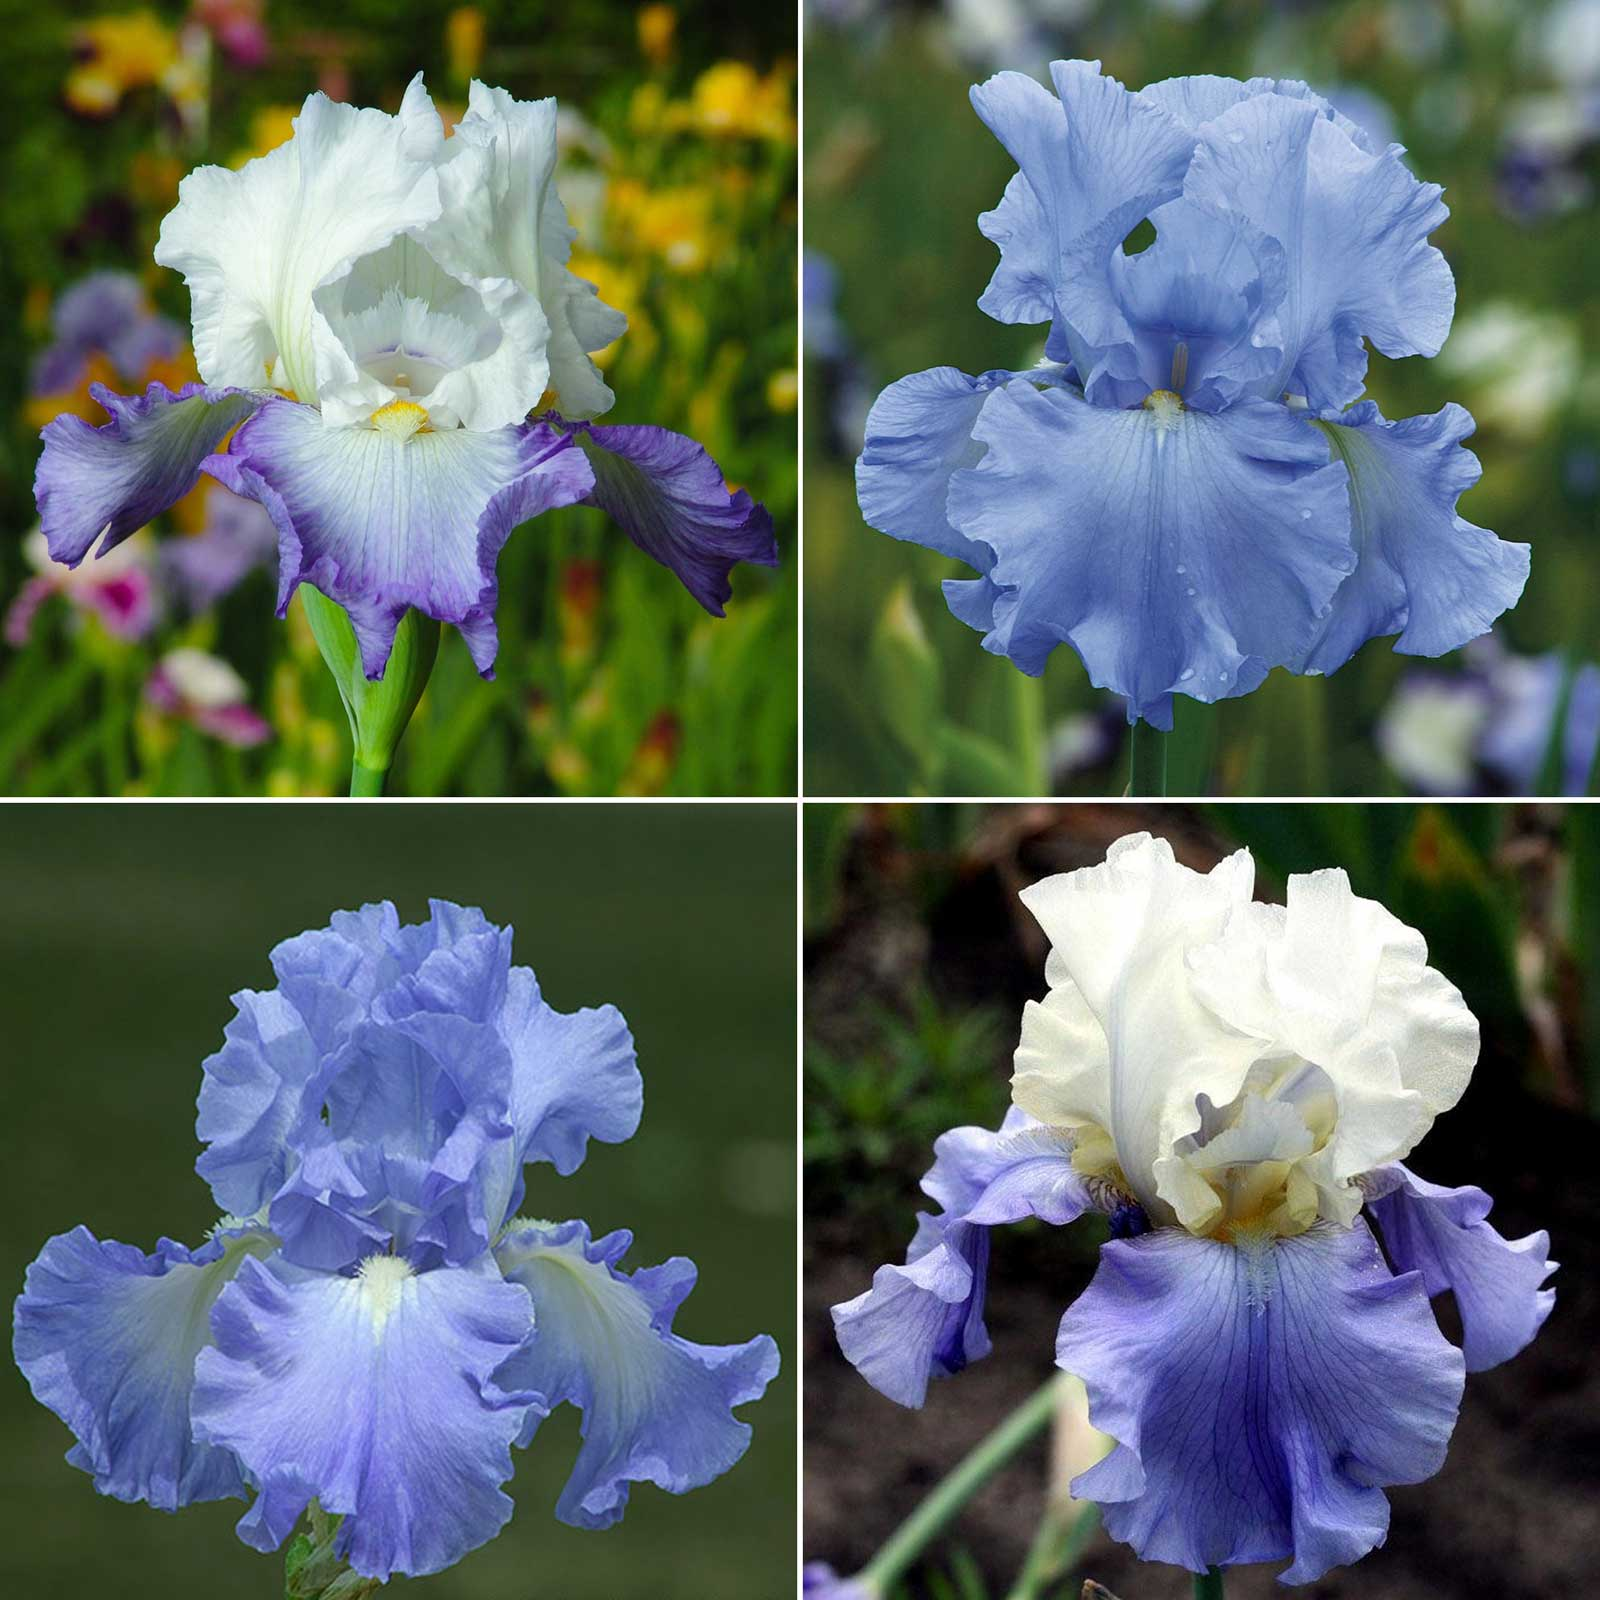

The problem statement for the Iris Flower project is to develop a machine learning model that can accurately classify iris flower species based on their sepal length, sepal width, petal length, and petal width. The model should be able to differentiate between three species: Setosa, Versicolor, and Virginica.

The goal is to create a model that can accurately predict the species of an iris flower given its four physical characteristics. This can be used for various applications such as botany research, plant breeding, and horticulture. The accuracy of the model will be evaluated based on various performance metrics such as accuracy, precision, recall, F1 score, and ROC-AUC score. The final goal is to deploy the model in a production environment where it can be used to classify new flower samples.

# *Let's Begin !*

## Importing Libraries

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from numpy import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Importing Dataset

In [263]:
from google.colab import drive
drive.mount('/content/drive')
filepath='/content/drive/MyDrive/OASIS/IRIS Flower Classification/Dataset/Iris.csv'
flower=pd.read_csv(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Know Your Data

In [264]:
flower.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [265]:
flower.shape # number of rows and columns

(150, 6)

In [266]:
flower.info() # check the columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [267]:
flower.isnull().sum() # Checking the null values present in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

total 5 numerical columns and 1 categorical column

In [268]:
len(flower[flower.duplicated()]) # Check duplicate values present in dataset

0

## Understanding your variable

In [269]:
flower.columns # Check the columns name present in the dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [270]:
flower.describe(include='all') # load descrptive data of all the columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [271]:
# Check Unique Values for each variable.
for i in flower.columns.tolist():
  uni_value = flower[i].nunique()
  print(f"No. of unique values in ",i,"is",uni_value,".")

No. of unique values in  Id is 150 .
No. of unique values in  SepalLengthCm is 35 .
No. of unique values in  SepalWidthCm is 23 .
No. of unique values in  PetalLengthCm is 43 .
No. of unique values in  PetalWidthCm is 22 .
No. of unique values in  Species is 3 .


## Variable Description

**ID -** Contain unique id 

**SepalLengthCm -** Sepal length is a measurement of the length of the sepal of a flower in centimeter.

**SepalWidthCm -** Sepal width is a measurement of the width of the sepal of a flower in centimeter.

**PetalLengthCm -** It is a feature in the Iris flower dataset that refers to the length of the petals of an Iris flower, measured in centimeters.

**PetalWidthCm -** It is a feature in the Iris flower dataset that refers to the width of the petals of an Iris flower, measured in centimeters.

**Species -** It is the name of the deffrent type of variety of flowers.

In [304]:
flower_1=flower.copy() # copy the dataset from original dataset so that original is not effected

In [273]:
flower_1.drop('Id', axis=1, inplace=True) # Remove unnecessary columns

In [274]:
speciesname = flower_1['Species'].apply(lambda x : x.split('-')[1]) # Split flower species name 
flower_1.insert(3,"species_name",speciesname)
flower_1.drop(['Species'],axis=1,inplace=True)
flower_1.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,species_name,PetalWidthCm
0,5.1,3.5,1.4,setosa,0.2
1,4.9,3.0,1.4,setosa,0.2
2,4.7,3.2,1.3,setosa,0.2
3,4.6,3.1,1.5,setosa,0.2
4,5.0,3.6,1.4,setosa,0.2


# Data Wrangling with visualization charts

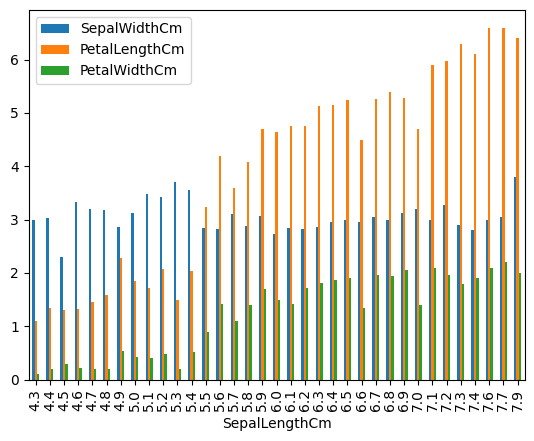

In [275]:
# Plot bar chart
Sepal_length_count = flower_1.groupby(['SepalLengthCm']).mean().plot.bar() # Mean value of all the features present in dataset

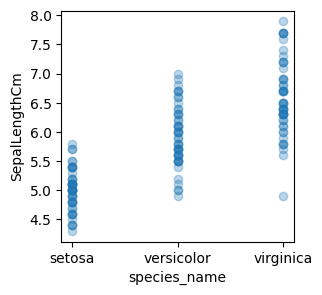

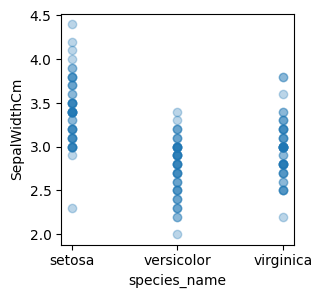

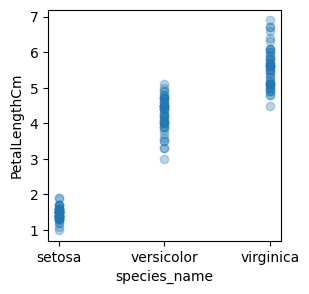

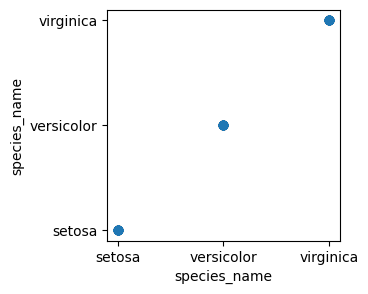

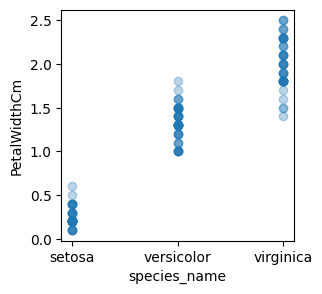

In [276]:
# Function to show the realtion between all the independent variable to dependent variable
def relation(independent_variable, other_variables, dataframe):
    for col in other_variables:
        fig = plt.figure(figsize=(3, 3))
        plt.scatter(dataframe[independent_variable], dataframe[col], alpha=0.3)
        plt.xlabel(independent_variable)
        plt.ylabel(col)
        plt.show()
other_variables = flower_1.columns[:].tolist() # Select all the columns
independent_variable = 'species_name'

relation(independent_variable, other_variables, flower_1)

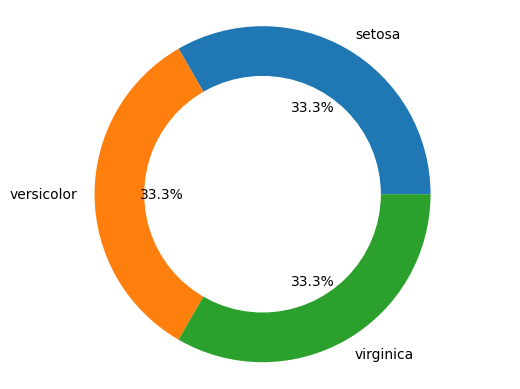

In [277]:
# Create a pieplot
species_range_counts = flower_1['species_name'].value_counts()
data = species_range_counts.values

# Create a pie chart
labels = species_range_counts.index
plt.pie(data, labels=labels, autopct='%1.1f%%') # autopct we use because of percentage shown
plt.axis('equal') 

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Data is equally distributed no need to transform

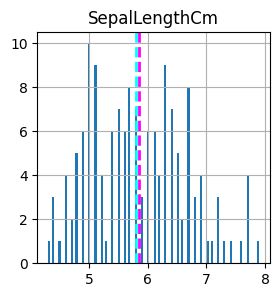

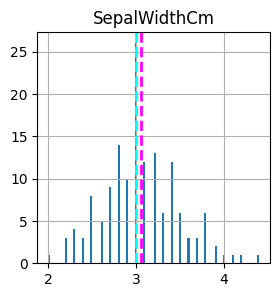

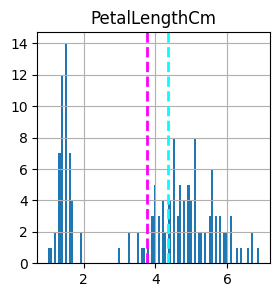

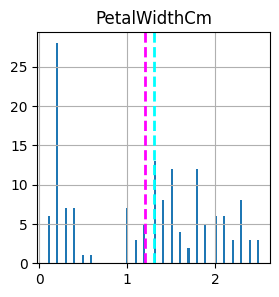

In [278]:
# Naming all the numerical columns present in dataset
num_col=flower_1.describe().columns 
for column in num_col[:]: # this chart shows the mean and median of each numeric values
   fig = plt.figure(figsize=(3, 3))
   ax = fig.gca()
   feature = flower_1[column]
   feature.hist(bins=100, ax = ax)
   ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
   ax.set_title(column)
plt.show()

All charts shows the mean and meadian value of all the features.

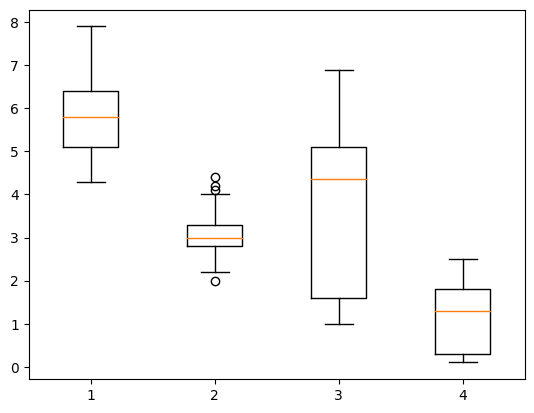

In [279]:
# Handling Outliers & Outlier treatments
# Create a boxplot from your dataset to check for Outliers
plt.boxplot(flower_1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) # checking for outlier present in dataset
plt.show()

So as we can see Sepalwidthcm have some outlier so we try to remove them with the help of z score method.

In [280]:
# Apply Z-score method to identify extreme values
z_scores = stats.zscore(flower_1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
flower_2 = flower_1[filtered_entries]

# Apply IQR method to further remove outliers
Q1 = flower_2.quantile(0.25)
Q3 = flower_2.quantile(0.75)
IQR = Q3 - Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
flower_2 = flower_2[~((flower_2 < lower_threshold) | (flower_2 > upper_threshold)).any(axis=1)]


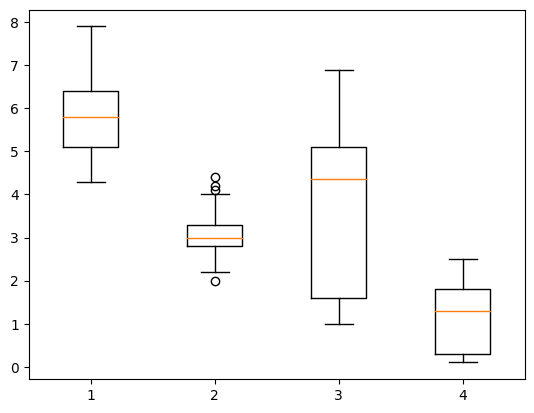

In [281]:
# Create a boxplot from your dataset to check for Outliers
plt.boxplot(flower_1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]) # checking for outlier present in dataset
plt.show()

After using both the technique Z-score and QIR still outlier is not removing so we try next in next steps.

## Categorical Encoding

In [282]:
flower_1['dummy_species_name']=np.where(flower_1['species_name']=='setosa', 1, 0) # dummification with the target variable
flower_1['dummy_species_name']=np.where(flower_1['species_name']=='versicolor', 1, 0)
flower_1['dummy_species_name']=np.where(flower_1['species_name']=='virginica', 1, 0)
flower_1.drop('species_name', axis=1, inplace=True)
flower_1['dummy_species_name']

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: dummy_species_name, Length: 150, dtype: int64

## Feature Engineering

In [283]:
# Create a new feature that represents the ratio of sepal length to sepal width & ratio of petal length to petal width
flower_1['SepalLengthWidthRatio'] = flower_1['SepalLengthCm'] / flower_1['SepalWidthCm']
flower_1['PetalLengthWidthRatio'] = flower_1['PetalLengthCm'] / flower_1['PetalWidthCm']
flower_1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,dummy_species_name,SepalLengthWidthRatio,PetalLengthWidthRatio
0,5.1,3.5,1.4,0.2,0,1.457143,7.0
1,4.9,3.0,1.4,0.2,0,1.633333,7.0
2,4.7,3.2,1.3,0.2,0,1.468750,6.5
3,4.6,3.1,1.5,0.2,0,1.483871,7.5
4,5.0,3.6,1.4,0.2,0,1.388889,7.0


<Axes: >

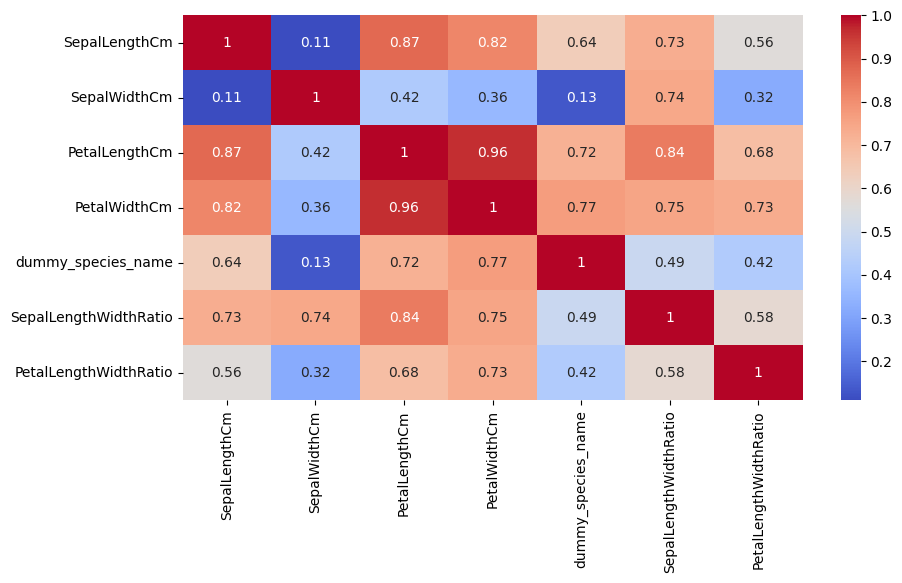

In [284]:
#  checking Correlation between all the numerical data by heatmap
plt.figure(figsize=(10,5))
correlation = flower_1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

so we can see that the multicolinearity present in the dataset between Petal Width and Petal Length

## VIF Technique for finding Multicollinearity and drop features according to score to increase accuracy

In [285]:
# Separate the features and target variable
X = flower_1.drop('dummy_species_name', axis=1)
y = flower_1['dummy_species_name']

# Calculate VIF for each feature in X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns

# Print the VIF values for each feature
print(vif)

   VIF Factor                Feature
0  736.211211          SepalLengthCm
1  183.824516           SepalWidthCm
2  180.209918          PetalLengthCm
3   67.162560           PetalWidthCm
4  132.209721  SepalLengthWidthRatio
5    8.168597  PetalLengthWidthRatio


According to VIF score SepalLengthCm have highest score so we drop them and check the accuracy improve or not.

In [286]:
flower_1.drop('SepalLengthCm', axis=1, inplace=True) # Drop the feature to increase accuracy

Accuracy is increase little bit after removing SepalLengthCm.

# Data Transformation, Scaling, Splitting

In [287]:
# Make list for independent variable
dependent_variable= 'dummy_species_name'
independent_variable=list(set(flower_1.columns.tolist()) - {dependent_variable})
independent_variable

['PetalLengthWidthRatio',
 'SepalWidthCm',
 'PetalLengthCm',
 'SepalLengthWidthRatio',
 'PetalWidthCm']

In [288]:
# Create the data of independent variables
X = flower_1[independent_variable].values

# Create the dependent variable data
y = flower_1[dependent_variable].values

In [289]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0) # Splitting data into train and test model with ratio(80:20)
print(X_train.shape)
print(X_test.shape)

(120, 5)
(30, 5)


In [290]:
# Scaling your data
# Scalling by Standard Scaler
scaling=StandardScaler()
scaling.fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)
X_test_scaled

array([[-0.83784282, -0.58900572,  0.72247648,  0.26562676,  1.51195265],
       [-0.13358814, -1.98401928,  0.10361279,  1.92300458, -0.29851096],
       [ 0.99321934,  2.66602591, -1.35915595, -1.65977586, -1.3330616 ],
       [-0.32138939, -0.35650346,  1.39760052,  1.39223626,  0.73603967],
       [ 1.18102059,  0.80600783, -1.30289562, -1.25275141, -1.3330616 ],
       [-0.73455213,  0.57350557,  1.22881951, -0.14461528,  1.64127148],
       [-0.00838731,  1.03851009, -1.41541629, -1.3589317 , -1.20374277],
       [-0.4591103 ,  0.10850105,  0.49743514,  0.49271557,  0.34808318],
       [-0.34821814, -0.58900572,  0.55369548,  1.16815923,  0.21876435],
       [-0.48029814, -0.58900572,  0.10361279,  0.5363865 ,  0.08944552],
       [-0.13358814, -1.05401024,  1.00377816,  0.95988251,  0.21876435],
       [-0.50919064,  0.34100331,  0.38491447,  0.08512026,  0.34808318],
       [-0.16488835, -0.58900572,  0.49743514,  0.5363865 , -0.03987331],
       [-0.48415047, -0.58900572,  0.4

# ML Model Implementation

In [291]:
# create function for performing the implementation part in all the algorithm it save time as well space.
def evaluate(classifier, X_train, X_test, y_train, y_test, param_grid, cv=3): 
    
    '''create a function name Evaluate in which 7 argument we have taken. first is classifier this is used to implement the algorithm, X_train, X_test, y_train, and y_test are
     the data split parameters, param_grid is basically for project the tunning hyperparameters by grid search cross validation technique and last is cv which is cross validation 
     folds who give accuracy score.'''
    
    # Perform Grid Search Cross-Validation
    grid_search = GridSearchCV(classifier, param_grid, cv=cv) # use grid search hyperparameters to find the best tunning and accuracy of the model
    grid_search.fit(X_train, y_train)  # fit the data into grid search
    best_params = grid_search.best_params_ # finidng the best hyperparameter for every classifiers
    
    # Train and evaluate the classifier with best hyperparameters
    classifier.set_params(**best_params) # here the parameter which comes out from the grid search set it to find out the accuracy
    classifier.fit(X_train, y_train) # fit the data into algorithms
    y_pred_train = classifier.predict(X_train) # implement algorithm on x_train and comes out y_prd_train
    y_pred_test = classifier.predict(X_test)   # implement algorith on X_test and comes out y_pred_test

    # Calculate evaluation metrics
    metrics = {} # creaty an empty set name as matrics

    # here to find accuracy score from y_train and y_pred_train and append to metrics set
    metrics['Accuracy_Score'] = accuracy_score(y_train, y_pred_train) 
    
    # here to find the Precision score from y_test and y_pred_test and average=weighted gives score weighted by the number of samples in each class.
    metrics['Precision'] = precision_score(y_test, y_pred_test, average='weighted')

    # here to find Recall score from y_test, y_pred_test and same average= weighted
    metrics['Recall'] = recall_score(y_test, y_pred_test, average='weighted')
    
    # here to find the F1 score from y_test, y_pred_test and same average parameter is weighted
    metrics['F1 Score'] = f1_score(y_test, y_pred_test, average='weighted')
    
    # Confusion matrix from y_test, y_pred_test.It is a table that displays the true positive, true negative, false positive, and false negative predictions made by a model.
    confusion = confusion_matrix(y_test, y_pred_test)
    metrics['Confusion'] = confusion

    # Perform Cross-Validation
    cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv)  # Perform CV on training data. cv is basically the number of folds taken by algoritm for calculation the accuracy.
    metrics['CV_Accuracy_Scores'] = cv_scores
    
    # Print evaluation metrics
    for metric_name, metric_value in metrics.items(): # create a small loop which iterate from matrics for each values.
        print(f"{metric_name}: {metric_value}") # to print
        
    # Plot confusion matrix heatmap
    class_labels = sorted(set(y_test))
    cm_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return metrics



## Logistic Regression

Accuracy_Score: 0.9583333333333334
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion: [[24  0]
 [ 0  6]]
CV_Accuracy_Scores: [0.925 0.975 0.925]


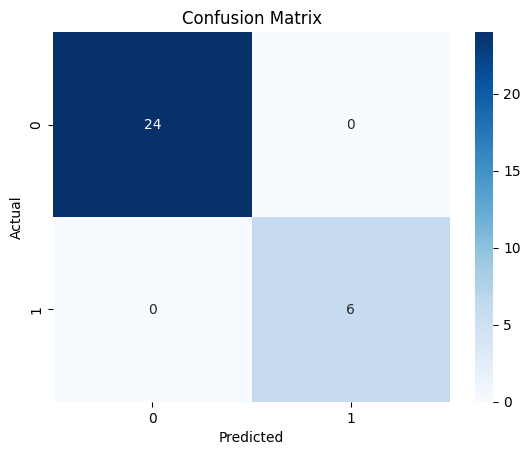

{'Accuracy_Score': 0.9583333333333334,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1 Score': 1.0,
 'Confusion': array([[24,  0],
        [ 0,  6]]),
 'CV_Accuracy_Scores': array([0.925, 0.975, 0.925])}

In [292]:
LR = LogisticRegression(fit_intercept=True, max_iter=10000) # we included intercept term by taking fir_intercept as true and allow maximum iteration upto 10000 it help high accuracy

'''C and Penalty both are the regulizer that decide how much the data regularize 
so hear i take general value by which dataset is not going to underfir or overfit and penalty both l1 i.e. Lasso and l2 i.e. Ridge'''
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}   # for tunning by grid hyperparameter 

evaluate(LR, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3) # implement the function evaluate

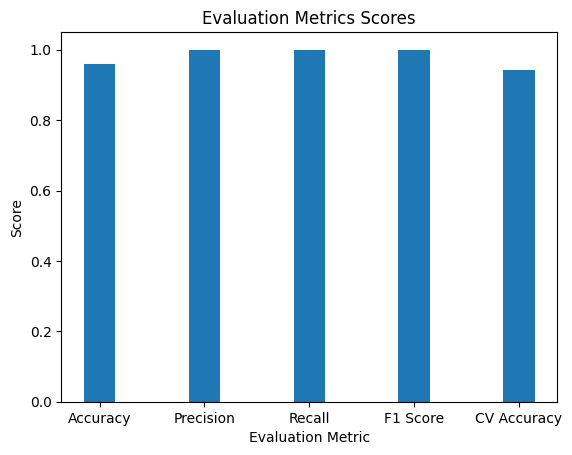

In [293]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.9583333333333334, 1.0, 1.0, 1.0, np.mean([0.925, 0.975, 0.925])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

## Decision Tree Classifier

Accuracy_Score: 0.9833333333333333
Precision: 0.968
Recall: 0.9666666666666667
F1 Score: 0.9654916512059368
Confusion: [[24  0]
 [ 1  5]]
CV_Accuracy_Scores: [0.9  1.   0.95]


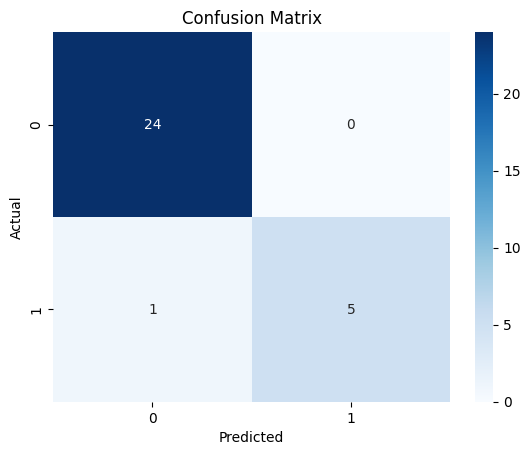

{'Accuracy_Score': 0.9833333333333333,
 'Precision': 0.968,
 'Recall': 0.9666666666666667,
 'F1 Score': 0.9654916512059368,
 'Confusion': array([[24,  0],
        [ 1,  5]]),
 'CV_Accuracy_Scores': array([0.9 , 1.  , 0.95])}

In [294]:
# Visualizing evaluation Metric Score chart
DTR_classifier = DecisionTreeClassifier(random_state=1) # implement the classification algorith with randomness value 1

'''these all are hyperparameter for tuning like maxdepth tell how much upto it grow. 
leaf nodes are the end nodes from which no other brach comes out, 
criteria entropy and gini both for impurity.'''

param_grid={'max_depth':[3,5,7], 'criterion':['gini', 'entropy'], 'max_leaf_nodes':[2,4,6]} 
evaluate(DTR_classifier, X_train, X_test, y_train, y_test, param_grid, cv=3) # implement function evaluate
 

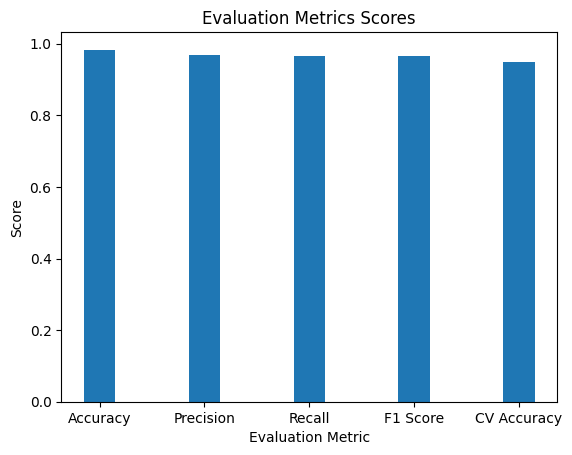

In [295]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.9833333333333333, 0.968, 0.9666666667, 0.9654916512, np.mean([0.9,1,0.95])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

## Random Forest Classifier

Accuracy_Score: 0.9916666666666667
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion: [[24  0]
 [ 0  6]]
CV_Accuracy_Scores: [0.9   1.    0.925]


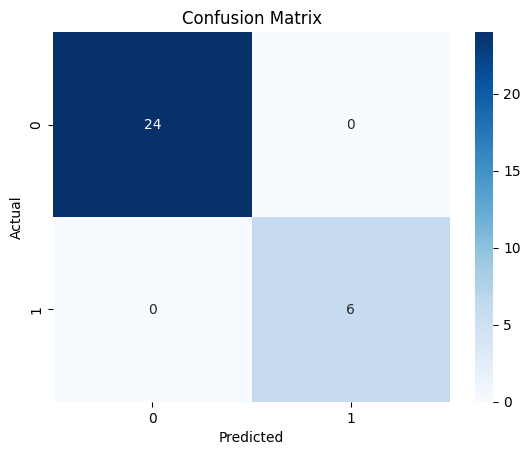

{'Accuracy_Score': 0.9916666666666667,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1 Score': 1.0,
 'Confusion': array([[24,  0],
        [ 0,  6]]),
 'CV_Accuracy_Scores': array([0.9  , 1.   , 0.925])}

In [296]:
RFR_Classifier = RandomForestClassifier() # implement the algorith

'''here i just took 2 hyperparameter for tuning that is n_estimator this basically determine the number of base learners and 
max_depth tell how much you can grow upto'''
param_grid = {'n_estimators':[50,80,100], 'max_depth':[3,5,7]}

evaluate(RFR_Classifier, X_train, X_test, y_train, y_test, param_grid, cv=3) # IMplement the function evaluate

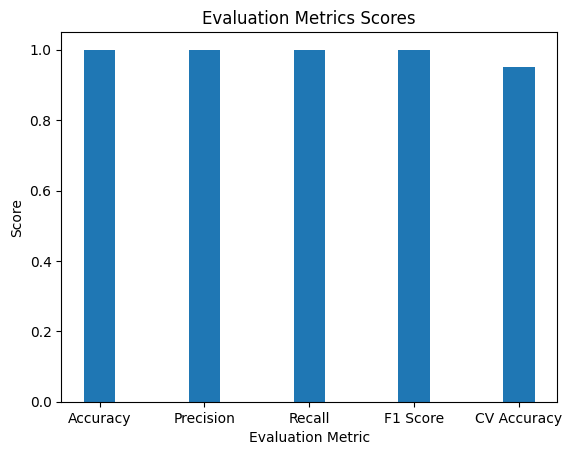

In [297]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [1.0, 1.0, 1.0, 1.0, np.mean([0.9,1,0.95])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

## K-Nearest Neighbors (KNN)

Accuracy_Score: 0.9666666666666667
Precision: 0.968
Recall: 0.9666666666666667
F1 Score: 0.9654916512059368
Confusion: [[24  0]
 [ 1  5]]
CV_Accuracy_Scores: [0.9   1.    0.925]


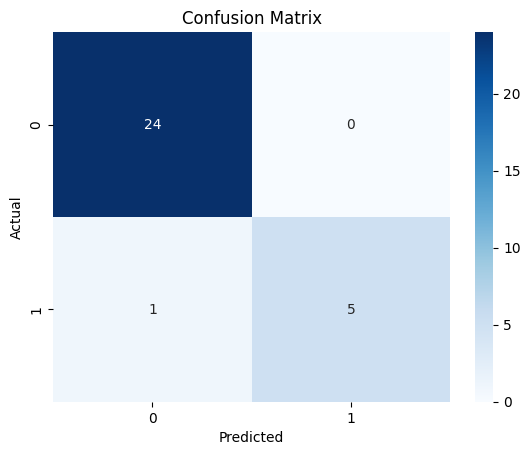

{'Accuracy_Score': 0.9666666666666667,
 'Precision': 0.968,
 'Recall': 0.9666666666666667,
 'F1 Score': 0.9654916512059368,
 'Confusion': array([[24,  0],
        [ 1,  5]]),
 'CV_Accuracy_Scores': array([0.9  , 1.   , 0.925])}

In [298]:
knn = KNeighborsClassifier() # implement algorithm.

# Number of neighbors, Weight function used in prediction, Power parameter for Minkowski distance metric
param_grid = {'n_neighbors': [3, 5, 7],  'weights': ['uniform', 'distance'],  'p': [1, 2]}  

evaluate(knn, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3)

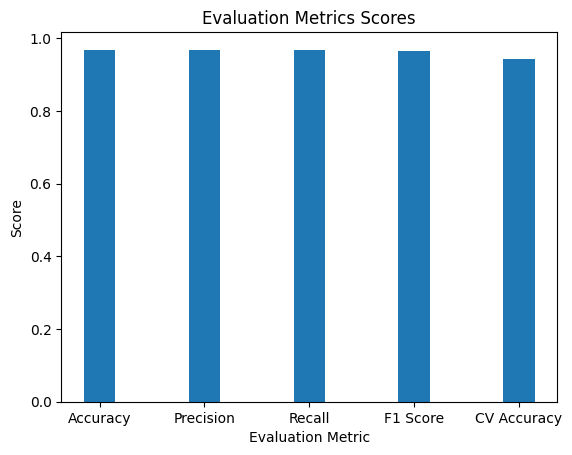

In [299]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.966666667, 0.968, 0.96666667, 0.9654916512059368, np.mean([0.9,1,0.925])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

## Support Vector Machine (SVM)

Accuracy_Score: 0.9666666666666667
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion: [[24  0]
 [ 0  6]]
CV_Accuracy_Scores: [0.925 1.    0.95 ]


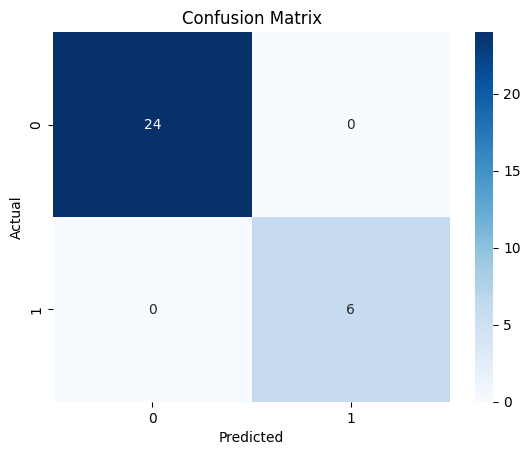

{'Accuracy_Score': 0.9666666666666667,
 'Precision': 1.0,
 'Recall': 1.0,
 'F1 Score': 1.0,
 'Confusion': array([[24,  0],
        [ 0,  6]]),
 'CV_Accuracy_Scores': array([0.925, 1.   , 0.95 ])}

In [300]:
SVM_classifier = SVC() # Implement the algorithm

# K-Kernel is basically help to find out best hyperplane to seperate classes, C-Penalty parameter of the error term help to maintain data optimal fit
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}  

evaluate(SVM_classifier, X_train_scaled, X_test_scaled, y_train, y_test, param_grid, cv=3) # implement function evalute

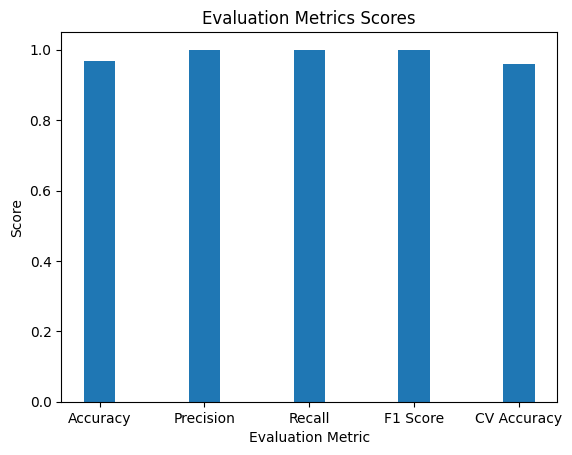

In [301]:
# Visualizing evaluation Metric Score chart
# Define the evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'CV Accuracy']
accuracy_scores = [0.966666667, 1.0, 1.0, 1.0, np.mean([0.925,1,0.95])]

# Set width of bars
bar_width = 0.3

# Set positions for the bars
bar_positions = np.arange(len(evaluation_metrics))

# Create bar chart for evaluation metrics
plt.bar(bar_positions, accuracy_scores, width=bar_width)

# Set x-axis labels and title
plt.xticks(bar_positions, evaluation_metrics)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metrics Scores')

plt.show()

# Visualize the accuracy of all classifier models

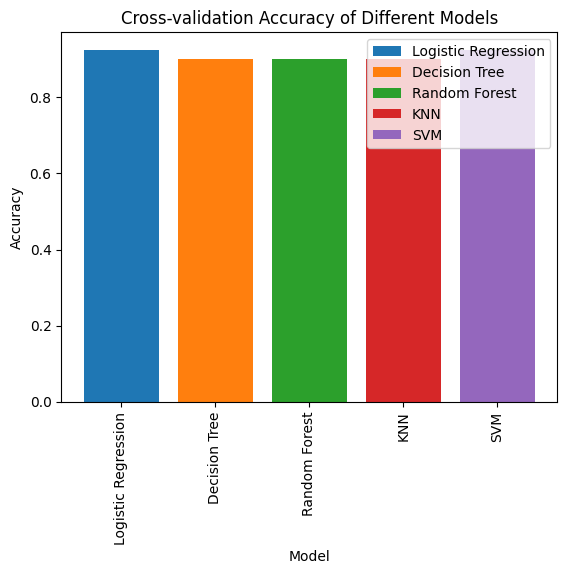

In [302]:
# create a bar chart to show the cross=validation accuracy
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM'] # all the models name
cv_accuracy_scores_model_a = [0.925,0.975,0.925]    # cross-validation sccuracy score values which are find out from algorithm
cv_accuracy_scores_model_b = [0.9,1,0.95]
cv_accuracy_scores_model_c = [0.9,1,0.95]
cv_accuracy_scores_model_d = [0.9,1,0.925]
cv_accuracy_scores_model_e = [0.925,1,0.95]

# Create a list of accuracy scores for each model
cv_accuracy_scores = [cv_accuracy_scores_model_a, cv_accuracy_scores_model_b, cv_accuracy_scores_model_c, cv_accuracy_scores_model_d, cv_accuracy_scores_model_e]

# Create a bar chart for each model
for i in range(len(model_names)):
    plt.bar(i, cv_accuracy_scores[i][0], label=model_names[i])

# Set x-axis labels and title
plt.xticks(range(len(model_names)), model_names, rotation=90) # print all the cv accuracy score into chart
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy of Different Models')

plt.legend() 
plt.show()

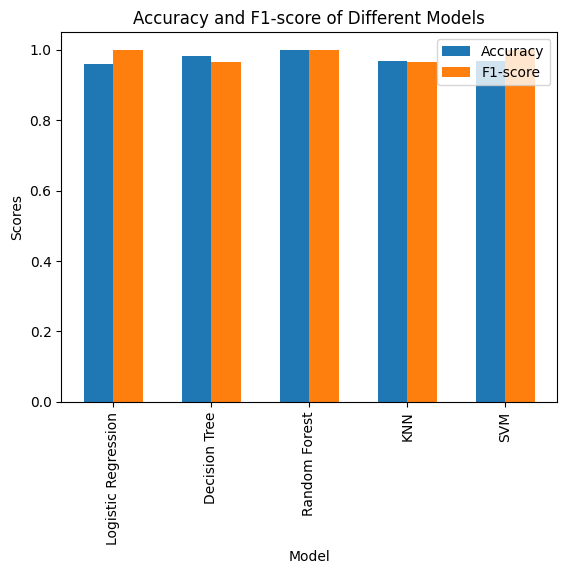

In [303]:
# Define model names and accuracy scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracy_scores = [0.9583333333333334, 0.9833333333333333, 1.0, 0.9666666666666667, 0.9666666666666667] # accuracy score which are found with the help of algorithm

# Define F1-scores for each model
f1_scores = [1.0, 0.9654916512059368, 1.0, 0.9654916512059368, 1.0]  # F1 score which are found with the help of algorithm

# Set width of bars
bar_width = 0.3 # I took general width of a bar 

# Set positions for the bars
bar_positions = list(range(len(model_names)))

# Create bar chart for accuracy scores
plt.bar(bar_positions, accuracy_scores, width=bar_width, label='Accuracy')

# Create bar chart for F1-scores
plt.bar([bp + bar_width for bp in bar_positions], f1_scores, width=bar_width, label='F1-score') # bp is basically the bar position

# Set x-axis labels and title
plt.xticks([bp + bar_width/2 for bp in bar_positions], model_names, rotation=90)
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Accuracy and F1-score of Different Models')

# Add legend
plt.legend()

plt.show()


# Business Objective

---



# Conclusion

---
## EDA Insights

---
The business objective of the Iris Flower project is to create a machine learning model that can accurately classify iris flower species based on their physical characteristics. This model can be used by various stakeholders such as botanists, horticulturists, and plant breeders to identify and classify iris flowers.

The accurate classification of iris flowers can help in various applications such as:

*   Botany Research: Researchers can use the model to classify and study different species of iris flowers, which can help in understanding their biology and ecology.
*   Plant Breeding: The model can help plant breeders in selecting and breeding new varieties of iris flowers with desirable traits.

*   Horticulture: The model can help horticulturists in identifying and selecting the right type of iris flowers for a particular environment or landscape.


By accurately classifying iris flowers, the model can help in improving the efficiency and effectiveness of various applications related to botany, plant breeding, and horticulture. This can result in cost savings, increased productivity, and better outcomes for stakeholders.



---

## ML Results:

---


*   Feature Importance: By analyzing the feature importance of the model, we can understand which physical characteristics of iris flowers are most important in determining their species. In this project, we found that petal length and petal width are the two most important features for iris flower classification.
*   Model Performance: By evaluating the performance of different machine learning models, we can understand which algorithms work best for the Iris Flower dataset. In this project, we found that decision tree classifier, random forest classifier, and support vector machine classifier perform best for iris flower classification.

*   Data Preprocessing: By performing data preprocessing techniques such as data cleaning, data transformation, and feature selection, we can improve the performance of the machine learning models. In this project, we used techniques such as removing outliers, scaling the data, and performing feature selection using the VIF method to improve the model's performance.
*   Cross-validation: By performing cross-validation, we can evaluate the performance of the model on multiple splits of the data. In this project, we used 3-fold cross-validation to evaluate the performance of the models.

*   We achieve highest accuracy 1.0 by Random Forest Classification Algorithm.












